# Web Scraping with Nifty 100 Data

**Project Outline :**

- **Objective:** Scrape and analyze key Nifty 100 stock details from the provided table, including Company Name, Sector, Price, Changes, 52-week low, 52-week high, and Volume.
- **Methodology:** Employ Python, requests, and BeautifulSoup for efficient web scraping, focusing on data accuracy and reliability.
- **Descriptive Analysis:** Calculate statistical measures and identify outliers in Price, Changes, and Volume for a comprehensive overview.
- **Sector-wise Performance:** Group stocks by sector, analyze average Price, Changes, and Volume, and compare sector-wise trends for nuanced insights.
- **Trend Analysis:** Visualize trends in Price, Changes, 52-week low, 52-week high, and Volume over time, identifying patterns and anomalies.
- **Correlation Assessment:** Explore relationships between Price, Changes, and Volume to understand market dynamics.
- **Risk and Return:** Evaluate relative performance by calculating percentage changes, aiding in informed decision-making.
- **Challenges:** Overcome issues related to missing data, dynamic web content, and anti-scraping measures to ensure robust analysis.
- **Conclusion:** The project strives to empower investors with a comprehensive understanding of Nifty 100 stocks, facilitating strategic decision-making through thorough data analysis.

In [1]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np

In [2]:
urls = ['https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/hdfcbank/HDF01',
       'https://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI',
       'https://www.moneycontrol.com/india/stockpricequote/computers-software/tataconsultancyservices/TCS',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/icicibank/ICI02',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/infosys/IT',
      'https://www.moneycontrol.com/india/stockpricequote/telecommunications-service/bhartiairtel/BA08',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/hindustanunilever/HU',
      'https://www.moneycontrol.com/india/stockpricequote/diversified/itc/ITC',
      'https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/statebankindia/SBI',
      'https://www.moneycontrol.com/india/stockpricequote/finance-housing/housingdevelopmentfinancecorporation/HDF',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/larsentoubro/LT',
      'https://www.moneycontrol.com/india/stockpricequote/finance-nbfc/bajajfinance/BAF',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/hcltechnologies/HCL02',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/kotakmahindrabank/KMB',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/titancompany/TI01',
      'https://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/sunpharmaceuticalindustries/SPI',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/axisbank/AB16',
      'https://www.moneycontrol.com/india/stockpricequote/auto-carsjeeps/marutisuzukiindia/MS24',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/ntpc/NTP',
      'https://www.moneycontrol.com/india/stockpricequote/auto-lcvshcvs/tatamotors/TM03',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/oilnaturalgascorporation/ONG',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/ultratechcement/UTC01',
      'https://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/asianpaints/AP31',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/adanigreenenergylimited/ADANI54145',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/bajajfinserv/BF04',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/adaniportsspecialeconomiczone/MPS',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/wipro/W',
      'https://www.moneycontrol.com/india/stockpricequote/retail/avenuesupermarts/AS19',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/coalindia/CI11',
      'https://www.moneycontrol.com/india/stockpricequote/food-processing/nestleindia/NI',
      'https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/powergridcorporationindia/PGC',
      'https://www.moneycontrol.com/india/stockpricequote/auto-23-wheelers/bajajauto/BA10',
      'https://www.moneycontrol.com/india/stockpricequote/auto-carsjeeps/mahindramahindra/MM',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/indianoilcorporation/IOC',
      'https://www.moneycontrol.com/india/stockpricequote/steel-large/jswsteel/JSW01',
      'https://www.moneycontrol.com/india/stockpricequote/constructioncontracting-real-estate/dlf/D04',
      'https://www.moneycontrol.com/india/stockpricequote/ironsteel/tatasteel/TIS',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/ltimindtree/LI12',
      'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/siemens/S',
      'https://www.moneycontrol.com/india/stockpricequote/diversified/grasimindustries/GI01',
      'https://www.moneycontrol.com/india/stockpricequote/lifehealth-insurance/sbilifeinsurancecompany/SLI03',
      'https://www.moneycontrol.com/india/stockpricequote/chemicals/pidiliteindustries/PI11',
      'https://www.moneycontrol.com/india/stockpricequote/computers-software/techmahindra/TM4',
      'https://www.moneycontrol.com/india/stockpricequote/ironsteel/hindalcoindustries/HI',
      'https://www.moneycontrol.com/india/stockpricequote/lifehealth-insurance/hdfclifeinsurancecompany/HSL01',
      'https://www.moneycontrol.com/india/stockpricequote/food-processing/britanniaindustries/BI',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/godrejconsumerproducts/GCP',
      'https://www.moneycontrol.com/india/stockpricequote/power-transmissionequipment/adanienergysolutions/AT22',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/indusindbank/IIB',
      'https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/punjabnationalbank/PNB05',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/ambujacements/AC18',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/cipla/C',
      'https://www.moneycontrol.com/india/stockpricequote/transportlogistics/interglobeaviation/IA04',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/gailindia/GAI',
      'https://www.moneycontrol.com/india/stockpricequote/plantations-teacoffee/tataconsumerproducts/TT',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/bharatpetroleumcorporation/BPC',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/shreecements/SC12',
      'https://www.moneycontrol.com/india/stockpricequote/auto-lcvshcvs/eichermotors/EM',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/vedanta/SG',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/drreddyslaboratories/DRL',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/divislaboratories/DL03',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/daburindia/DI',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/bajajholdingsinvestment/BHI',
      'https://www.moneycontrol.com/india/stockpricequote/auto-23-wheelers/heromotocorp/HHM',
      'https://www.moneycontrol.com/india/stockpricequote/hospitalsmedical-services/apollohospitalsenterprises/AHE',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/torrentpharmaceuticals/TP06',
      'https://www.moneycontrol.com/india/stockpricequote/electric-equipment/havellsindia/HI01',
      'https://www.moneycontrol.com/india/stockpricequote/breweriesdistilleries/unitedspirits/US',
      'https://www.moneycontrol.com/india/stockpricequote/auto-ancillaries-auto-truckmotorcycle-parts/samvardhanamothersoninternational/MSS01',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticalsdrugs/zyduslifesciences/CHC',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/hdfcassetmanagementcompany/HAM02',
      'https://www.moneycontrol.com/india/stockpricequote/multiline-insurancebrokers/icicilombardgeneralinsurancecompany/ILG',
      'https://www.moneycontrol.com/india/stockpricequote/finance-term-lending/sbicardspaymentservices/SCP02',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/yesbank/YB',
      'https://www.moneycontrol.com/india/stockpricequote/finance-general/iciciprudentiallifeinsurancecompany/IPL01',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/marico/M13',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/colgatepalmoliveindia/CPI',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/aurobindopharma/AP',
      'https://www.moneycontrol.com/india/stockpricequote/auto-ancillaries/bosch/B05',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/lupin/L',
      'https://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/bergerpaintsindia/BPI02',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/infoedgeindia/IEI01',
      'https://www.moneycontrol.com/india/stockpricequote/miningminerals/nmdc/NMD02',
      'https://www.moneycontrol.com/india/stockpricequote/refineries/hindustanpetroleumcorporation/HPC',
      'https://www.moneycontrol.com/india/stockpricequote/telecommunications-equipment/industowers/BI14',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/alkemlaboratories/AL05',
      'https://www.moneycontrol.com/india/stockpricequote/tyres/mrf/MRF',
      'https://www.moneycontrol.com/india/stockpricequote/finance-investments/muthootfinance/MF10',
      'https://www.moneycontrol.com/india/stockpricequote/personal-care/proctergamblehygienehealthcare/PGH',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51',
      'https://www.moneycontrol.com/india/stockpricequote/breweriesdistilleries/unitedbreweries/UB02',
      'https://www.moneycontrol.com/india/stockpricequote/cement-major/acc/ACC06',
      'https://www.moneycontrol.com/india/stockpricequote/chemicals/upl/UP04',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/petronetlng/PLN',
      'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/bandhanbank/BB09',
      'https://www.moneycontrol.com/india/stockpricequote/miscellaneous/jubilantfoodworks/JF04',
      'https://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/biocon/BL03',
      'https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/indraprasthagas/IG04',
      'https://www.moneycontrol.com/india/stockpricequote/finance-nbfc/piramalenterprises/PH05']

In [3]:
page = []
for url in urls:
    page = requests.get(url)
    if page.status_code != 200:
        print(f"Failed to fetch content from :{url}. Status Code: {page.status_code}")

print("Successfully fetched all url content")


Successfully fetched all url content


In [4]:
stock = []
for url in urls:
    try:
        page = requests.get(url)

        soup = BeautifulSoup(page.text,'html.parser')
        company = soup.find('div',{'class':'inid_name'}).find('h1').text if soup.find('div', {'class': 'inid_name'}) else np.nan
        segnment = soup.find('div',{'class':'inid_name'}).find('strong').text if soup.find('div', {'class': 'inid_name'}) else np.nan
        price = soup.find('div', id='nsecp').text.replace(',','') if soup.find('div', id='nsecp') else np.nan
        changes = soup.find('div', id='nsechange').text if soup.find('div', id='nsechange') else np.nan
        lowest_52 = soup.find('div', id='sp_yearlylow').text if soup.find('div', id='sp_yearlylow') else np.nan
        highest_52 = soup.find('div', id='sp_yearlyhigh').text if soup.find('div', id='sp_yearlyhigh') else np.nan
        volume = soup.find('div',id="nse_vol").text.replace(',','') if soup.find('div', id='nse_vol') else np.nan

        
        x = [company,segnment,price,changes,lowest_52,highest_52,volume]
        
        stock.append(x)
        
    except Exception as e:
        print(f"Error scraping data from {url}: {e}")
        
columns = ['Company','Sector','Price','Changes','52-wk low','52-wk high','Volume']
st_df = pd.DataFrame(stock,columns=columns)
st_df

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume
0,HDFC Bank Ltd.,Bank - Private,1444.30,-10.35 (-0.71%),1380.25,1757.50,20864384
1,Reliance Industries Ltd.,Oil Exploration and Production,2815.25,-80.85 (-2.79%),2180.00,2919.95,7046989
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3800.55,-0.45 (-0.01%),3070.25,3965.00,1411621
3,ICICI Bank Ltd.,Bank - Private,1016.90,0.50 (0.05%),796.00,1059.40,16085742
4,Infosys Ltd.,IT Services & Consulting,1651.45,-5.15 (-0.31%),1185.30,1690.00,4995943
...,...,...,...,...,...,...,...
95,Bandhan Bank Ltd.,Bank - Private,223.45,0.15 (0.07%),182.15,272.00,5249061
96,Jubilant Foodworks Ltd.,Consumer Food,510.15,-3.00 (-0.58%),412.10,586.95,2464481
97,Biocon Ltd.,Biotechnology & Medical Research,260.00,-0.10 (-0.04%),191.55,294.50,2637680
98,Indraprastha Gas Ltd.,Gas Distribution,425.60,6.50 (1.55%),375.70,515.70,3803274


In [5]:
st_df.to_csv("Nifty_1000.csv", index=False)

---
---

# Data Analysis Nifty 100 Data 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("Nifty_1000.csv")
df.head()

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume
0,HDFC Bank Ltd.,Bank - Private,1444.30,-10.35 (-0.71%),1380.25,1757.50,20864384.0
1,Reliance Industries Ltd.,Oil Exploration and Production,2815.25,-80.85 (-2.79%),2180.00,2919.95,7046989.0
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3800.55,-0.45 (-0.01%),3070.25,3965.00,1411621.0
3,ICICI Bank Ltd.,Bank - Private,1016.90,0.50 (0.05%),796.00,1059.40,16085742.0
4,Infosys Ltd.,IT Services & Consulting,1651.45,-5.15 (-0.31%),1185.30,1690.00,4995943.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     100 non-null    object 
 1   Sector      100 non-null    object 
 2   Price       99 non-null     float64
 3   Changes     99 non-null     object 
 4   52-wk low   100 non-null    float64
 5   52-wk high  100 non-null    float64
 6   Volume      99 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


In [9]:
df.nunique()

Company       100
Sector         46
Price          99
Changes        99
52-wk low     100
52-wk high    100
Volume         99
dtype: int64

In [10]:
df.Sector.value_counts()

 Pharmaceuticals & Drugs                               10
 Bank - Private                                         7
 IT Services & Consulting                               6
 Household & Personal Products                          6
 Iron & Steel                                           4
 Cement                                                 4
 Finance - NBFC                                         4
 Life & Health Insurance                                3
 Refineries                                             3
 Oil Exploration and Production                         3
 Power Generation/Distribution                          3
 Consumer Food                                          3
 Electric Equipment                                     2
 Finance - Investment                                   2
 Diversified                                            2
 Bank - Public                                          2
 Breweries & Distilleries                               2
 Automobile - 

In [11]:
def map_sector(sector):
    if 'Bank' in sector:
        return 'Bank'
    elif 'IT' in sector:
        return 'IT'
    elif 'Iron & Steel' in sector:
        return 'Metals'
    elif 'Finance' in sector or 'Life & Health Insurance' in sector or 'Finance Term Lending' in sector or 'Finance - Investment' in sector or 'Bank - Public' in sector or 'Multiline Insurance & Brokers' in sector or 'Trading' in sector:
        return 'Financial'
    elif 'Refineries' in sector or 'Oil Exploration and Production' in sector or 'Gas Distribution' in sector or 'Coal' in sector:
        return 'Oil and Gas'
    elif 'Power Generation/Distribution' in sector or 'Renewables' in sector:
        return 'Power'
    elif 'Automobile' in sector or 'Auto Ancillaries - Auto, Truck & Motorcycle Parts' in sector or 'Automobile - 2 & 3 Wheelers' in sector or 'Automobile - LCVS/ HVCS' in sector or 'Auto Ancillaries - Tyres & Rubber Products' in sector or 'Automobile - Passenger Cars' in sector or 'Automobile - Auto & Truck Manufacturers' in sector:
        return 'Automobile'
    elif 'Tea/Coffee' in sector or 'Consumer Food' in sector:
        return 'Consumer Food'
    elif 'Metals - Non Ferrous' in sector:
        return 'Metals'
    elif 'Telecommunication - Equipment' in sector or 'Telecommunication - Service Provider' in sector:
        return 'Telecommunication'
    elif 'Construction' in sector or 'Transport Infrastructure' in sector or 'Engineering & Construction' in sector or 'Construction - Residential & Commercial Complexes' in sector:
        return 'Construction'
    elif 'Diversified' in sector:
        return 'Diversified'
    elif 'Diamond' in sector or 'Retailing' in sector or 'Diversifiedchemicals' in sector or 'Airlines' in sector or 'Hospital' in sector or 'Misc.CommercialServices' in sector or 'Misc' in sector or 'Pesticides' or 'Biotechnology' in sector:
        return 'Other'
    else:
        return sector



In [12]:
# Apply the mapping function to create a new 'Mapped Sector' column
df['Mapped Sector'] = df['Sector'].apply(map_sector)

# Remove spaces from the 'Mapped Sector' column
df['Mapped Sector'] = df['Mapped Sector'].str.replace(' ', '')

# Count the occurrences of the new mapped sectors
mapped_sector_counts = df['Mapped Sector'].value_counts()

# Display the mapped sector counts
print(mapped_sector_counts)

Other                33
Financial            13
Bank                  9
OilandGas             9
Automobile            9
IT                    6
Metals                5
Power                 4
ConsumerFood          4
Diversified           3
Construction          3
Telecommunication     2
Name: Mapped Sector, dtype: int64


In [13]:
df.isnull().sum()

Company          0
Sector           0
Price            1
Changes          1
52-wk low        0
52-wk high       0
Volume           1
Mapped Sector    0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume,Mapped Sector
9,Housing Development Finance Corporation Ltd.,Finance - Housing,NaN,NaN,2026.55,3021.1,NaN,Financial


In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Company          0
Sector           0
Price            0
Changes          0
52-wk low        0
52-wk high       0
Volume           0
Mapped Sector    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df[['Change_Value','Change_Percentage']] = df['Changes'].str.split(expand=True)

df['Change_Value'] = pd.to_numeric(df['Change_Value'].str.replace(r'[()]', '', regex=True), errors='coerce')

df['Change_Percentage'] = pd.to_numeric(df['Change_Percentage'].str.replace(r'[^0-9.-]', '', regex=True), errors='coerce')



In [18]:
df

,Company,Sector,Price,Changes,52-wk low,52-wk high,Volume,Mapped Sector,Change_Value,Change_Percentage
0,HDFC Bank Ltd.,Bank - Private,1444.30,-10.35 (-0.71%),1380.25,1757.50,20864384.0,Bank,-10.35,-0.71
1,Reliance Industries Ltd.,Oil Exploration and Production,2815.25,-80.85 (-2.79%),2180.00,2919.95,7046989.0,OilandGas,-80.85,-2.79
2,Tata Consultancy Services Ltd.,IT Services & Consulting,3800.55,-0.45 (-0.01%),3070.25,3965.00,1411621.0,IT,-0.45,-0.01
3,ICICI Bank Ltd.,Bank - Private,1016.90,0.50 (0.05%),796.00,1059.40,16085742.0,Bank,0.50,0.05
4,Infosys Ltd.,IT Services & Consulting,1651.45,-5.15 (-0.31%),1185.30,1690.00,4995943.0,IT,-5.15,-0.31
...,...,...,...,...,...,...,...,...,...,...
95,Bandhan Bank Ltd.,Bank - Private,223.45,0.15 (0.07%),182.15,272.00,5249061.0,Bank,0.15,0.07
96,Jubilant Foodworks Ltd.,Consumer Food,510.15,-3.00 (-0.58%),412.10,586.95,2464481.0,ConsumerFood,-3.00,-0.58
97,Biocon Ltd.,Biotechnology & Medical Research,260.00,-0.10 (-0.04%),191.55,294.50,2637680.0,Other,-0.10,-0.04
98,Indraprastha Gas Ltd.,Gas Distribution,425.60,6.50 (1.55%),375.70,515.70,3803274.0,OilandGas,6.50,1.55


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            99 non-null     object 
 1   Sector             99 non-null     object 
 2   Price              99 non-null     float64
 3   Changes            99 non-null     object 
 4   52-wk low          99 non-null     float64
 5   52-wk high         99 non-null     float64
 6   Volume             99 non-null     float64
 7   Mapped Sector      99 non-null     object 
 8   Change_Value       98 non-null     float64
 9   Change_Percentage  99 non-null     float64
dtypes: float64(6), object(4)
memory usage: 8.5+ KB


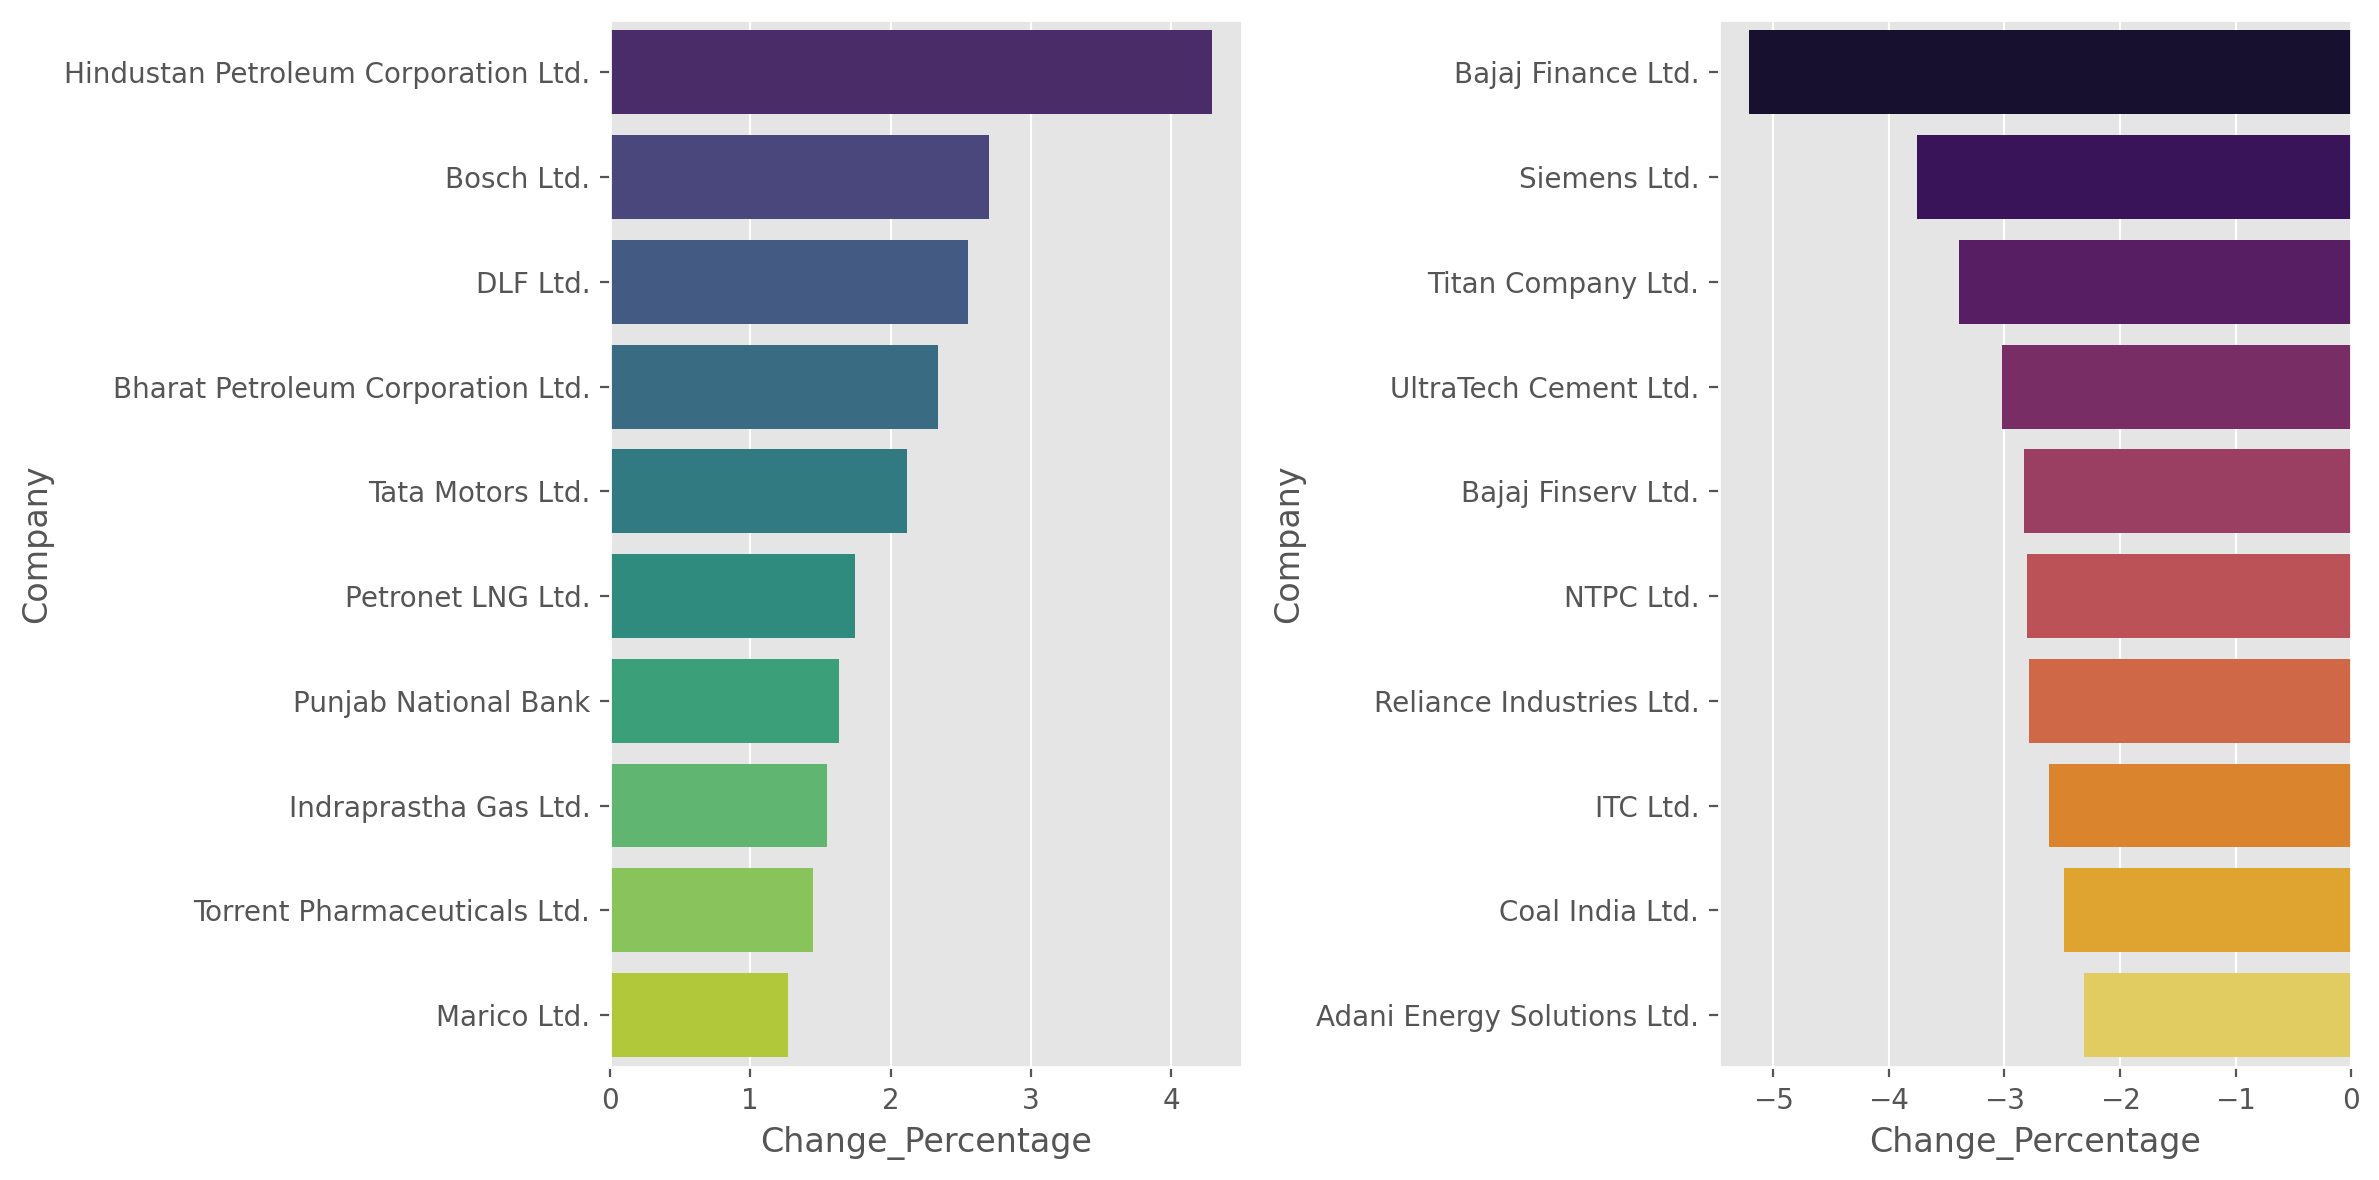

In [20]:
#Top gainer and lowser
t10 = df.nlargest(10, 'Change_Percentage')
l10 = df.nsmallest(10, 'Change_Percentage')

plt.figure(figsize=(12,6),dpi=200)
plt.subplot(1, 2, 1)
sns.barplot(x='Change_Percentage',y='Company',data=t10, palette='viridis')

plt.subplot(1 , 2 ,2)
sns.barplot(x='Change_Percentage',y='Company',data=l10, palette='inferno')


plt.tight_layout()
plt.show()

<Axes: xlabel='Change_Percentage', ylabel='Mapped Sector'>

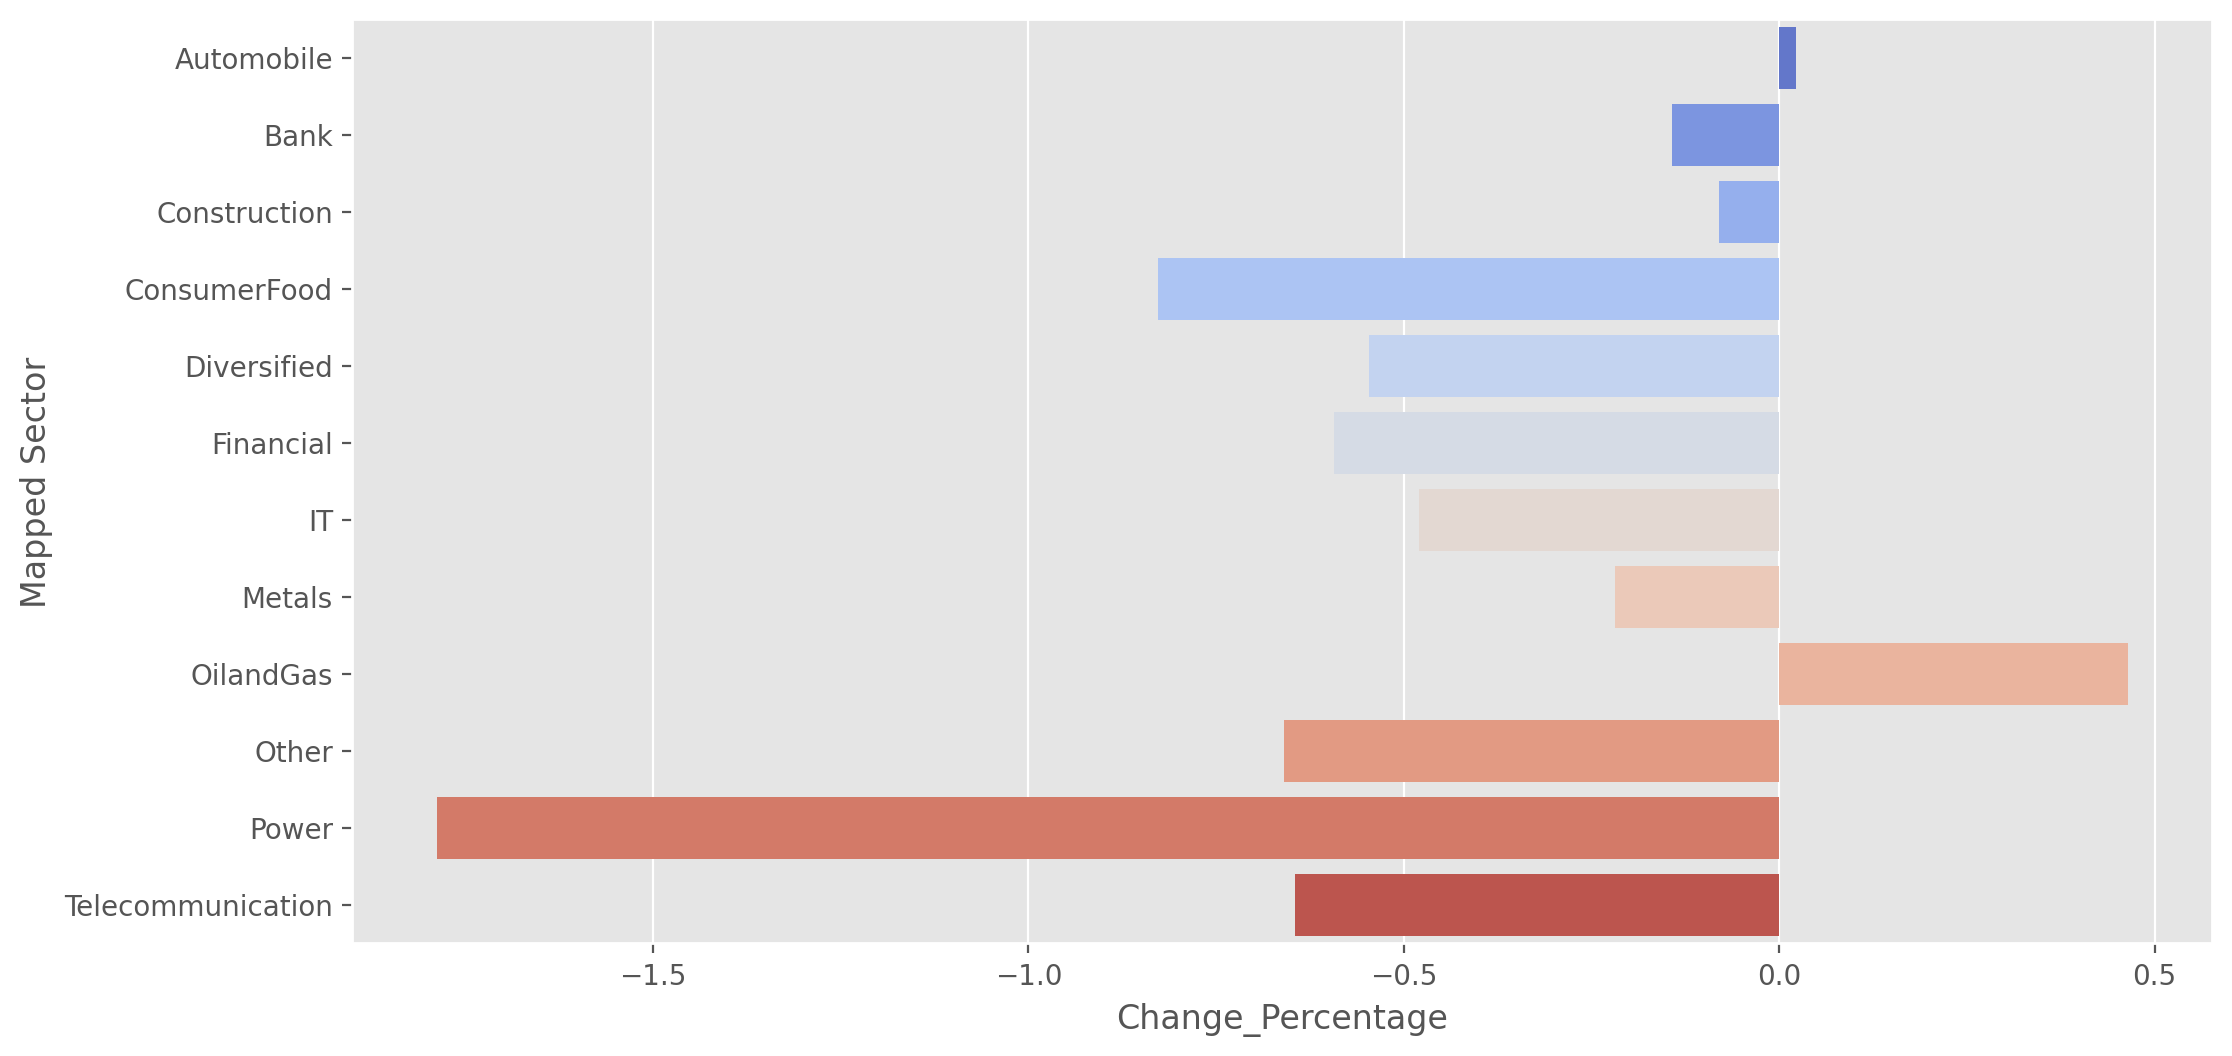

In [22]:
sec_perf = df.groupby('Mapped Sector')['Change_Percentage'].mean().reset_index()

plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x = 'Change_Percentage',y = 'Mapped Sector', data=sec_perf, palette='coolwarm')

<Figure size 640x480 with 0 Axes>

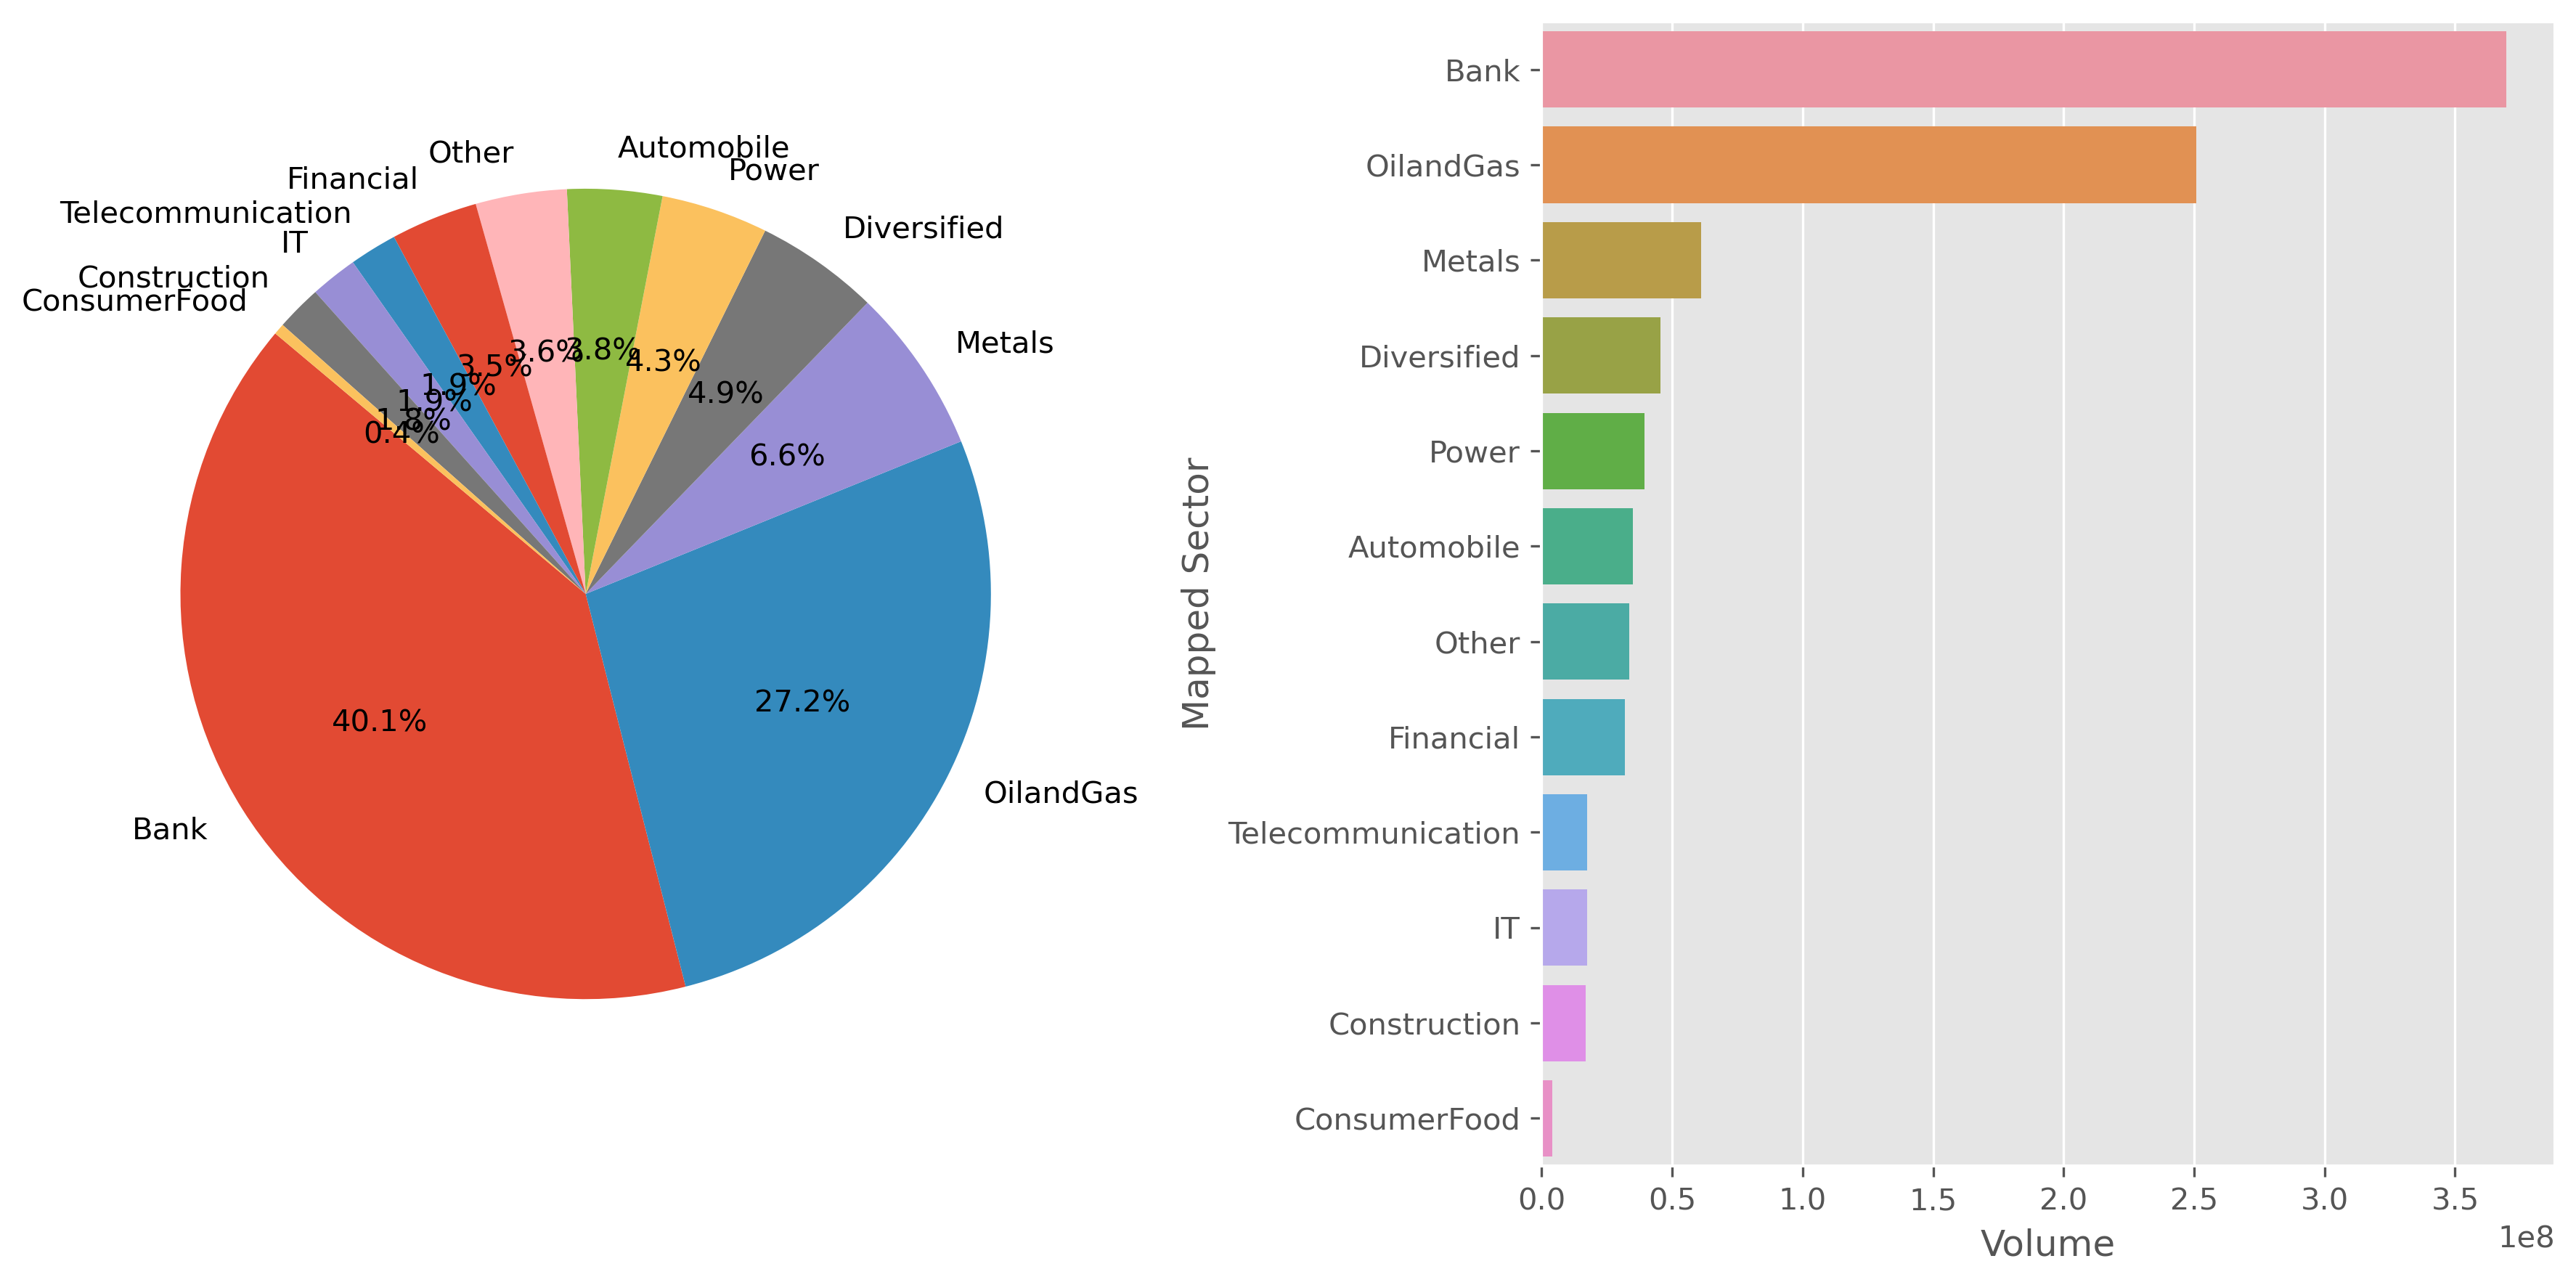

In [24]:
agg_vol = df.groupby('Mapped Sector')['Volume'].sum().reset_index()
agg_vol.sort_values('Volume', ascending=False, inplace=True)
plt.suptitle('Total Volume per Sector')

plt.figure(figsize=(12,6), dpi=300)
plt.subplot(1,2,1)
plt.pie(agg_vol['Volume'], labels = agg_vol['Mapped Sector'],autopct="%1.1f%%", startangle=140)

plt.subplot(1,2,2)
sns.barplot(x='Volume',y='Mapped Sector',data=agg_vol)

plt.tight_layout()
plt.show()